<a href="https://colab.research.google.com/github/VitorFRodrigues/Data-Science-Bootcamp/blob/main/Proj01/Bootcamp_Proj_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Módulo 1 do Bootcamp Data Science 3 - Análise de internações e óbitos do SUS ocorridos de 2008 a 2021
---
Autor: Vitor Rodrigues

e-mail: vitorfbaiano@gmail.com

---

## 1.Introdução

Os óbitos ocorridos no Brasil, são ocasionados por diversos fatores. Apesar de que, nos anos de 2020/2021, o primeiro pensamento seja relacionar esta palavra as consequências da situação pandêmica vivida, o país historicamente vem passando por pequenos surtos de doenças que invariavelmente trazem a morte para sua população.

Seja por problemas socioeconômicos, variações climáticas, ambientais ou importação/exportação de insumos, estamos sujeitos a exposição de doenças as quais dependendo do organismo infectante, poderá ser tão mortal quanto o vírus Ebola ou tão infeccioso quanto o vírus da gripe.

Desde o século 16, epidemias de leishmaniose, esquistossomose, conjuntivite e outras enfermidades trazidas pelos colonizadores afetaram a população brasileira. Dentre estas as três principais epidemias que atingiram o Brasil ao longo da história são:

1.	**Febre amarela**: ocorrida durante um grande surto no Rio de Janeiro em 1850, foi a primeira epidemia que atingiu o Brasil. A enfermidade era vista como grande vilã do país, porque atacava tanto o campo quanto a cidade, afetando o comercio de café. Na época, não se sabia que doenças como essa poderiam ser causadas por um vírus nem que a febre amarela era transmitida por um mosquito, e não entre pessoas. Graças, ao combate à febre amarela, a ciência e medicina brasileira foi desenvolvida, moldando o crescimento das cidades no início do século 20. Embora exista uma vacina contra a febre amarela, distribuída gratuitamente, a doença ainda é considerada endêmica em nosso país, especialmente após aumento no número de casos nos últimos anos.
2.	**Gripe espanhola**: ocorrida em 1918, esta pandemia possui similaridades com o Covid-19. O uso de máscaras era obrigatório e medidas de distanciamento social foram adotadas para conter a doença. Ao final daquele ano, mais de 14 mil mortes foram registradas apenas no Rio de Janeiro. A situação começou a ser revertida após criação de hospitais e postos de atendimento à população.
3.	**Varíola**: doença hoje considerada erradicada do mundo, segundo a OMS, a varíola foi um grande problema para o Brasil no início do século 20. Esta foi somente controlada após obrigatoriedade da imunização.
4.	Por fim, podemos citar nos registros mais recentes, o ***zika vírus***, que afetou milhares de pessoas entre 2015 e 2016 — embora a febre causada pelo zika não seja grave, sua ocorrência em gestantes foi associada ao nascimento de crianças com microcefalia.

Deste modo, o presente trabalho visa analisar dados de internações e óbitos registrados pelo Sistema Único de Saúde (SUS) com o intuito de investigar os picos e quedas ocorridos comparando-os com dados históricos. Além disso será analisada a presença de sazonalidades sobre pequenos surtos ocasionados pelo influenza, tuberculose ou dengue.


## 2.Objetivo

Considerando o que foi explanado na introdução, esta análise tem como objetivo entender as variações de obitos e internações ocorridos de 2008 a 2021, nas regiões e estados brasileiros. Para isto, analisaremos as seguintes informações:

- Número de internações regitradas;
- Número de óbitos registrados por região;
- Comparativo entre picos registrados e indicação gráfica; 
- Analise anual em busca de sazonalidades;


## 3.Preparação dos Dados

### 3.1. Importação das Bibliotecas e Dados

Foi utilizada a biblioteca *Pandas* para manipulação de *DataFrames* e do *Matplotlib* para criação e manipulação de gráficos.

Quanto aos dados, estes foram extraídos através do site [datasus](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qibr.def). Estes se encontram devidamente compilados no seguinte repositório [GitHub](https://github.com/VitorFRodrigues/Data-Science-Bootcamp/tree/main/Proj01/dados).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
Internacoes_URL = 'https://raw.githubusercontent.com/VitorFRodrigues/Data-Science-Bootcamp/main/Proj01/dados/Process-Internacoes-Ano-Mes.csv'
Obitos_URL = 'https://raw.githubusercontent.com/VitorFRodrigues/Data-Science-Bootcamp/main/Proj01/dados/Process-Obitos-Ano-Mes.csv'

Leitura dos dados e criação de *DataFrame*:
- *Comma-Separated Values* (.CSV);
- Identificação de como os dados estão codificados (ISO-8859-1);
- Filtragem de cabeçalho e rodapé;
- Separador entre células (ponto-e-vígula);
- Indicação dos identificadores de milhar e decimal;


In [2]:
internacoes = pd.read_csv(Internacoes_URL, 
                          encoding="ISO-8859-1",
                          skiprows=3, skipfooter=12,
                          sep = ";",
                          thousands=".", decimal=",")
obitos = pd.read_csv(Obitos_URL, 
                     encoding="ISO-8859-1",
                     skiprows=3, skipfooter=12,
                     sep = ";", 
                     thousands=".", decimal=",")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


In [3]:
internacoes.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
0,11 Rondônia,4142,7301,4318,4285,4511,3871,7560,7615,7507,7098,7004,6609,6441,7501,7835,7882,8462,8033,7950,7986,7842,8293,8497,8486,8561,8375,8198,8530,8769,8005,8440,8322,8776,8461,8056,7772,8014,7912,8362,...,9965,10379,9494,10422,9498,9444,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,11116,9300,9552,7674,7530,6989,8540,8712,9122,8379,9297,8356,9005,8491,9648,9950,9801,9483,8472,8692,6998,1448181
1,12 Acre,2087,3071,3783,3737,3609,4026,4880,4250,4552,4128,3836,4128,4430,4240,4162,4894,4647,4291,4582,4379,-,4689,3959,4327,4412,3665,4203,4735,4505,4143,3891,3906,4051,3778,4343,4055,4712,4235,4364,...,3941,3982,3698,3973,3766,2580,3284,2899,3797,3037,3658,4213,4402,4033,3889,4255,3632,3464,3782,4086,3743,2943,3104,3171,3479,3774,3454,4225,3612,3698,3915,3483,3969,4299,4696,3164,4592,4381,-,658201
2,13 Amazonas,9325,12754,14780,14556,12833,14073,15430,15660,15061,14610,12389,12320,11034,10186,14478,12991,12876,12803,13929,13341,13917,13160,12689,12389,13510,12787,13160,14166,13970,14139,14064,12192,11684,14032,13542,13634,14083,12878,13807,...,15802,15657,15803,16095,15196,15117,17444,15345,16796,16052,17051,15779,17043,16103,16964,16725,16206,15284,16411,15479,16265,13108,14329,14985,15055,14266,15315,15452,15104,13961,14731,17559,17719,18004,17727,18696,18005,18744,15747,2358255
3,14 Roraima,1475,1812,1813,1964,2037,2030,2307,2153,1913,2550,2416,2233,2190,1971,2277,2340,2974,2570,2828,3024,3049,2108,2592,2122,2280,2027,2787,2898,2940,2912,2905,2701,2762,2580,2510,1897,1905,1912,2341,...,3661,3739,3471,3901,3696,3591,3274,3086,2871,3172,3033,3591,4324,4881,4366,4288,4019,3767,3679,3775,3576,3132,2916,2846,2899,3263,3063,3481,3435,3496,3157,3304,3693,3333,3215,3276,4021,3929,3519,487697
4,15 Pará,38628,41530,42790,41112,44643,43506,45110,43661,44256,43789,40719,39594,40817,40830,44278,43555,43281,42611,47090,46189,46025,45873,42567,43629,43572,43935,45532,43479,46248,44347,43483,43274,44740,43924,43262,42724,44832,43480,44181,...,40710,41713,42521,44184,41147,39475,38268,39379,40493,41863,42449,41512,37799,38526,41093,41973,41094,40501,39529,40926,39504,30762,29909,32154,33399,38814,36143,37169,38225,37065,37334,37223,37960,38363,41896,39095,38860,35960,12487,6700460


In [4]:
obitos.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
0,11 Rondônia,57,99,45,43,54,47,109,114,105,124,90,82,100,93,110,124,98,123,123,115,112,127,148,102,143,102,114,132,180,167,201,197,271,173,159,168,172,142,165,...,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,358,450,480,414,295,270,366,446,427,812,736,645,533,392,350,304,40403
1,12 Acre,30,94,76,103,94,71,114,116,104,77,53,66,136,97,93,107,107,79,100,84,-,129,101,111,107,70,115,141,112,106,85,114,130,137,107,125,149,125,101,...,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,335,309,121,223,182,-,19785
2,13 Amazonas,149,243,312,320,240,270,288,284,254,228,157,203,231,155,179,274,267,298,290,318,315,260,267,259,276,208,237,251,258,343,254,280,275,260,283,250,310,342,332,...,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1338,1637,1898,1218,897,881,854,684,585,70213
3,14 Roraima,23,21,23,38,26,24,38,29,34,62,29,36,49,37,28,41,39,58,36,63,48,61,52,49,58,52,57,54,66,62,66,57,77,81,72,52,48,31,48,...,123,104,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,299,210,168,180,188,190,156,13570
4,15 Pará,543,581,655,524,622,629,742,658,767,683,542,575,677,657,697,701,744,675,781,733,801,739,695,641,809,723,721,721,678,744,791,816,780,771,780,705,832,783,818,...,919,1024,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2221,1528,1765,1197,1021,1084,1074,1182,1294,1557,2179,2502,1603,1280,1211,380,149137


### 3.2.Manipulação dos DataFrames

Tanto os dados dos obitos quanto internações possuem **27 linhas e 167 colunas** contabilizando dados dos 27 estados da federação computados de jan/2008 a ago/2021.

Abaixo será criado um DataFrame extra separando o estado, seu respectivo código e sua região.

In [5]:
UFs = obitos['Unidade da Federação'].str.split(' ', n=1, expand=True)
regiao = []
for i in range(len(UFs)):
  if UFs[0][i][0] == '1':
    regiao.append('Norte') 
  elif UFs[0][i][0] == '2':
    regiao.append('Nordeste')
  elif UFs[0][i][0] == '3':
    regiao.append('Sudeste')
  elif UFs[0][i][0] == '4':
    regiao.append('Sul')
  else:
    regiao.append('Centro-Oeste')
UFs["Região"] = regiao
UFs

,0,1,Região
0,11,Rondônia,Norte
1,12,Acre,Norte
2,13,Amazonas,Norte
3,14,Roraima,Norte
4,15,Pará,Norte
5,16,Amapá,Norte
6,17,Tocantins,Norte
7,21,Maranhão,Nordeste
8,22,Piauí,Nordeste
9,23,Ceará,Nordeste


De modo a auxiliar na filtragem dos dados, as Unidades da Federação foram movidas para coluna *index* enquanto que a coluna de **Totais** foi removida.
Além disso, todos os dados vazios serão substituídos pelo valor zero e suas respectivas células terão seu tipo transformado para **float** (antes **string**).

In [6]:
internacoes = internacoes.set_index("Unidade da Federação")
internacoes = internacoes.drop('Total', axis=1)
obitos = obitos.set_index("Unidade da Federação")
obitos = obitos.drop('Total', axis=1)

In [7]:
internacoes = internacoes.replace('-', '0')
obitos = obitos.replace('-', '0')

for i in internacoes.columns:
  internacoes[i] = internacoes[i].astype(float)
  obitos[i] = obitos[i].astype(float)


##4.Extração de gráficos para análises

Nesta seção serão plotados os gráficos informados na seção 2. Logo abaixo de cada plot teremos sua respectiva análise.

###4.1.Internações e óbitos em cada região do Brasil



In [8]:
internacoes["Região"] = regiao
obitos["Região"] = regiao

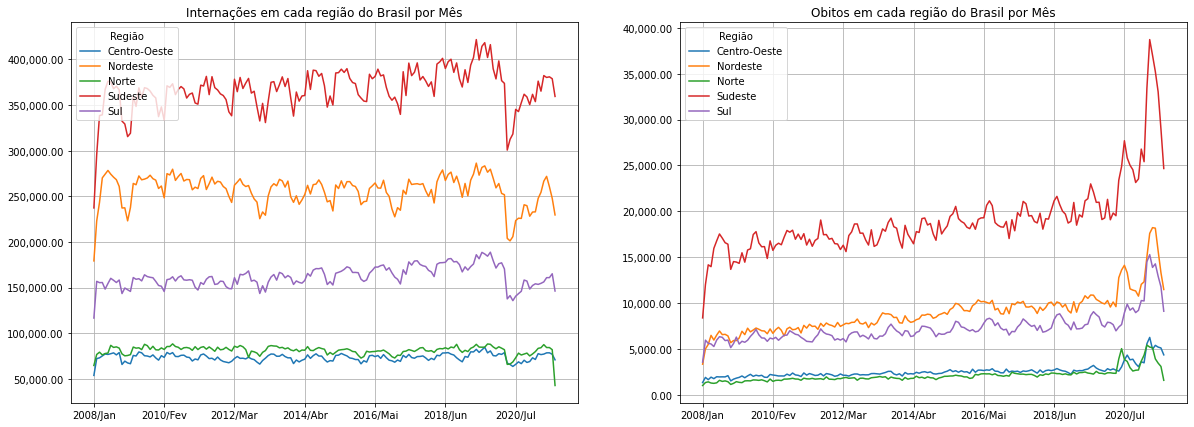

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2)

internacoes.groupby('Região').sum().T.plot(ax=axes[0], figsize=(20,7), grid=True)
axes[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axes[0].set_title("Internações em cada região do Brasil por Mês")

obitos.groupby('Região').sum().T.plot(ax=axes[1], figsize=(20,7), grid=True)
axes[1].set_title("Obitos em cada região do Brasil por Mês")
axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.show()

Análise dos gráficos: 

1. Internações:
  - As regiões Sul e Sudeste vem apresentando leve crescimento no número de internações;
  - Há uma certa sazonalidade (padrão no aumento/diminuição dos casos) que será analisado a seguir;
  - Todas as regiões sofreram redução brusca em meados de jul/2020 e voltaram a crescer nos meses subsequentes;
  - Regiões com baixa desidade populacional (hab/km²) apresentam redução de jul/2020 amenizada;
2. Obitos
  - As regiões Nordeste, Sudeste e Sul vem apresentando crescimento vertiginoso no número de óbitos;
  - Mesma sazonalidade é apresentada no indice de obitos;
  - Todas as regiões sofreram aumento brusco de mortes em meados de jul/2020 e apresentaram aumento ainda maior nos meses subsequentes;
  - Regiões com baixa desidade populacional (hab/km²) apresentam indice de mortes nivelado com aumento em jul/2020 e nos meses subsequentes;
3. Provaveis conclusões:
  - Apresentação de pico de mortes em meados de jul/2020 informa chegada de primeira onda provocada pelo Covid-19. O que é comprovado com a baixa do número de internações no mesmo mês;
  - O crescimento da população em hospitais provocou contaminação massiva do virus. Sem a presença da vacina nesta época;
  - Os picos de mortes serão analisados focados a seguir.

###4.2.Análise da primeira e segunda onda Covid-19
###4.3.Investigação da sazonalidade durante Pré-pandemia
###4.4.Análise gráfica de Pernambuco 

## Referências
- [SUS](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qibr.def)
- [Summit Saúde Brasil 2021](https://summitsaude.estadao.com.br/desafios-no-brasil/a-piores-epidemias-que-atingiram-o-brasil/)

# Rascunho

In [11]:
regiao_int = []
regiao_ob = []
for i in range(27):
  regiao_int.append(regiao[i]+"_int")
  regiao_ob.append(regiao[i]+"_ob")

internacoes["Região"] = regiao_int
obitos["Região"] = regiao_ob